In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
mygs = TokaMaker()
#mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_mediumvv_noplate.h5')
mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_0809_noplate.h5')
#mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_old_noplates.h5')
#mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_oldvv_noplates.h5')
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Turn off divertor coils
coil_bounds[-3:-1, 0] = 0
coil_bounds[-3:-1, 1] = 0

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  4.914E+00
    # of points  =    5539
    # of edges   =   16498
    # of cells   =   10960
    # of boundary points =     116
    # of boundary edges  =     116
    # of boundary cells  =     116
  Resolution statistics:
    hmin =  3.000E-03
    hrms =  3.420E-02
    hmax =  1.0

Starting non-linear GS solver
     1  9.3763E+00  4.2988E+00  2.4131E-02  1.0473E+00  8.2909E-05 -0.0000E+00
     2  7.4173E+00  3.4593E+00  4.6108E-03  1.0461E+00  4.8210E-05 -0.0000E+00
     3  6.9705E+00  3.2705E+00  1.0781E-03  1.0451E+00  3.0587E-05 -0.0000E+00
     4  6.8206E+00  3.2073E+00  8.9983E-04  1.0445E+00  2.2271E-05 -0.0000E+00
     5  6.7687E+00  3.1856E+00  5.1839E-04  1.0442E+00  1.8318E-05 -0.0000E+00
     6  6.7515E+00  3.1784E+00  2.5103E-04  1.0441E+00  1.6408E-05 -0.0000E+00
     7  6.7462E+00  3.1762E+00  1.1022E-04  1.0441E+00  1.5495E-05 -0.0000E+00
     8  6.7448E+00  3.1756E+00  4.5127E-05  1.0440E+00  1.5061E-05 -0.0000E+00
     9  6.7445E+00  3.1755E+00  1.7423E-05  1.0440E+00  1.4851E-05 -0.0000E+00
    10  6.7444E+00  3.1755E+00  6.3597E-06  1.0440E+00  1.4748E-05 -0.0000E+00
    11  6.7445E+00  3.1755E+00  2.1856E-06  1.0440E+00  1.4696E-05 -0.0000E+00
    12  6.7445E+00  3.1755E+00  6.9945E-07  1.0440E+00  1.4670E-05 -0.0000E+00
 Timing:  0.2877989998

Starting non-linear GS solver
     1  7.2561E+00  3.4361E+00  2.1993E-02  1.0354E+00 -1.4322E-04 -0.0000E+00
     2  6.1118E+00  2.9122E+00  3.6433E-03  1.0360E+00 -1.1157E-04 -0.0000E+00
     3  5.8317E+00  2.7858E+00  9.7197E-04  1.0359E+00 -9.3566E-05 -0.0000E+00
     4  5.7291E+00  2.7389E+00  8.1860E-04  1.0358E+00 -8.3142E-05 -0.0000E+00
     5  5.6894E+00  2.7204E+00  4.8488E-04  1.0358E+00 -7.7377E-05 -0.0000E+00
     6  5.6742E+00  2.7131E+00  2.4922E-04  1.0357E+00 -7.4333E-05 -0.0000E+00
     7  5.6685E+00  2.7102E+00  1.1945E-04  1.0357E+00 -7.2753E-05 -0.0000E+00
     8  5.6665E+00  2.7091E+00  5.4857E-05  1.0357E+00 -7.1942E-05 -0.0000E+00
     9  5.6657E+00  2.7087E+00  2.4453E-05  1.0357E+00 -7.1531E-05 -0.0000E+00
    10  5.6655E+00  2.7085E+00  1.0655E-05  1.0357E+00 -7.1323E-05 -0.0000E+00
    11  5.6655E+00  2.7085E+00  4.5612E-06  1.0357E+00 -7.1219E-05 -0.0000E+00
    12  5.6654E+00  2.7085E+00  1.9249E-06  1.0357E+00 -7.1167E-05 -0.0000E+00
    13  5.6654E+00  2.

Starting non-linear GS solver
     1  6.6614E+00  3.1908E+00  2.1564E-02  1.0371E+00 -1.3650E-05 -0.0000E+00
     2  6.3987E+00  3.0728E+00  3.5903E-03  1.0375E+00 -1.0854E-05 -0.0000E+00
     3  6.3206E+00  3.0392E+00  7.5481E-04  1.0375E+00 -9.0159E-06 -0.0000E+00
     4  6.2910E+00  3.0267E+00  2.2114E-04  1.0375E+00 -7.8057E-06 -0.0000E+00
     5  6.2793E+00  3.0218E+00  9.8019E-05  1.0374E+00 -7.0542E-06 -0.0000E+00
     6  6.2747E+00  3.0199E+00  4.9397E-05  1.0374E+00 -6.6126E-06 -0.0000E+00
     7  6.2728E+00  3.0191E+00  2.4461E-05  1.0374E+00 -6.3676E-06 -0.0000E+00
     8  6.2721E+00  3.0189E+00  1.1649E-05  1.0374E+00 -6.2358E-06 -0.0000E+00
     9  6.2718E+00  3.0187E+00  5.3574E-06  1.0374E+00 -6.1662E-06 -0.0000E+00
    10  6.2717E+00  3.0187E+00  2.3961E-06  1.0374E+00 -6.1301E-06 -0.0000E+00
    11  6.2717E+00  3.0187E+00  1.0484E-06  1.0374E+00 -6.1115E-06 -0.0000E+00
    12  6.2716E+00  3.0187E+00  4.5084E-07  1.0374E+00 -6.1021E-06 -0.0000E+00
 Timing:   6.076669999

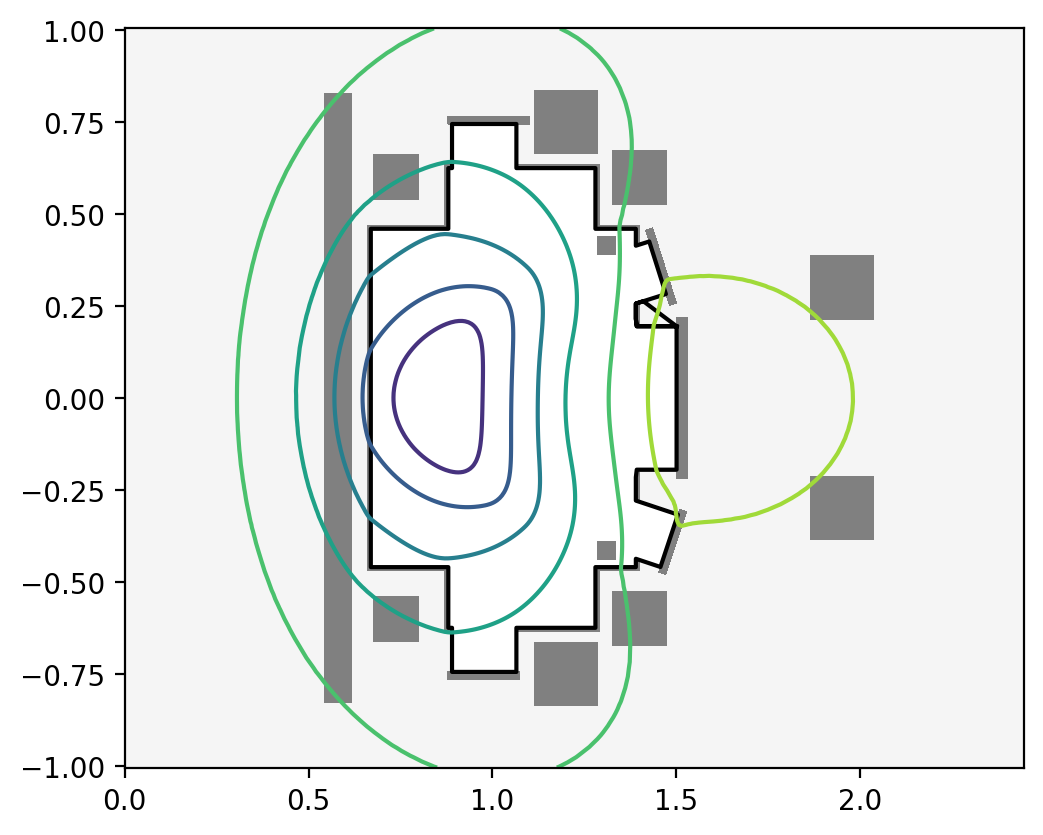

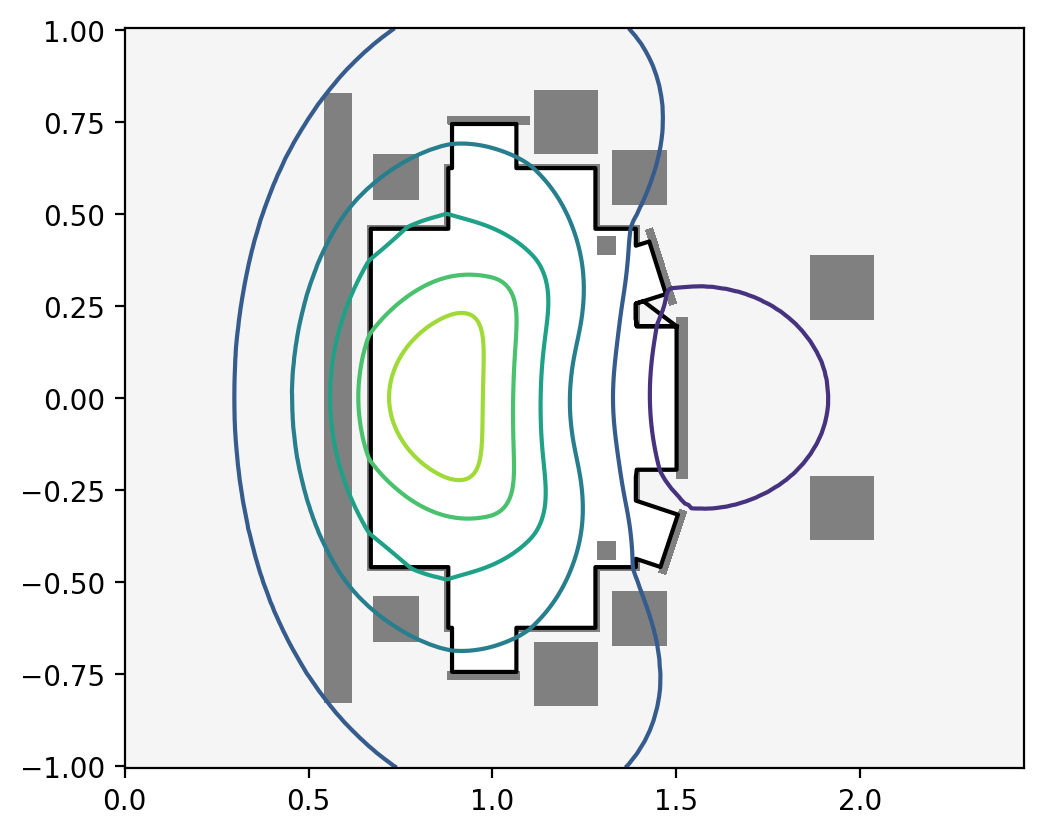

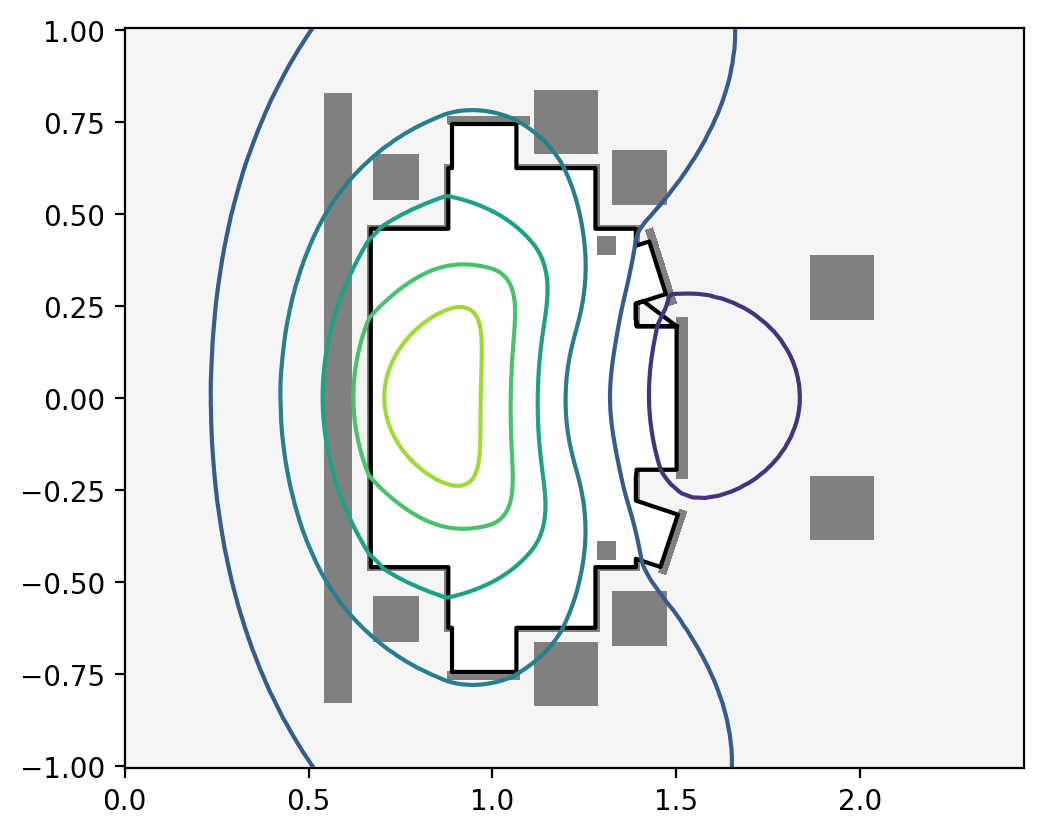

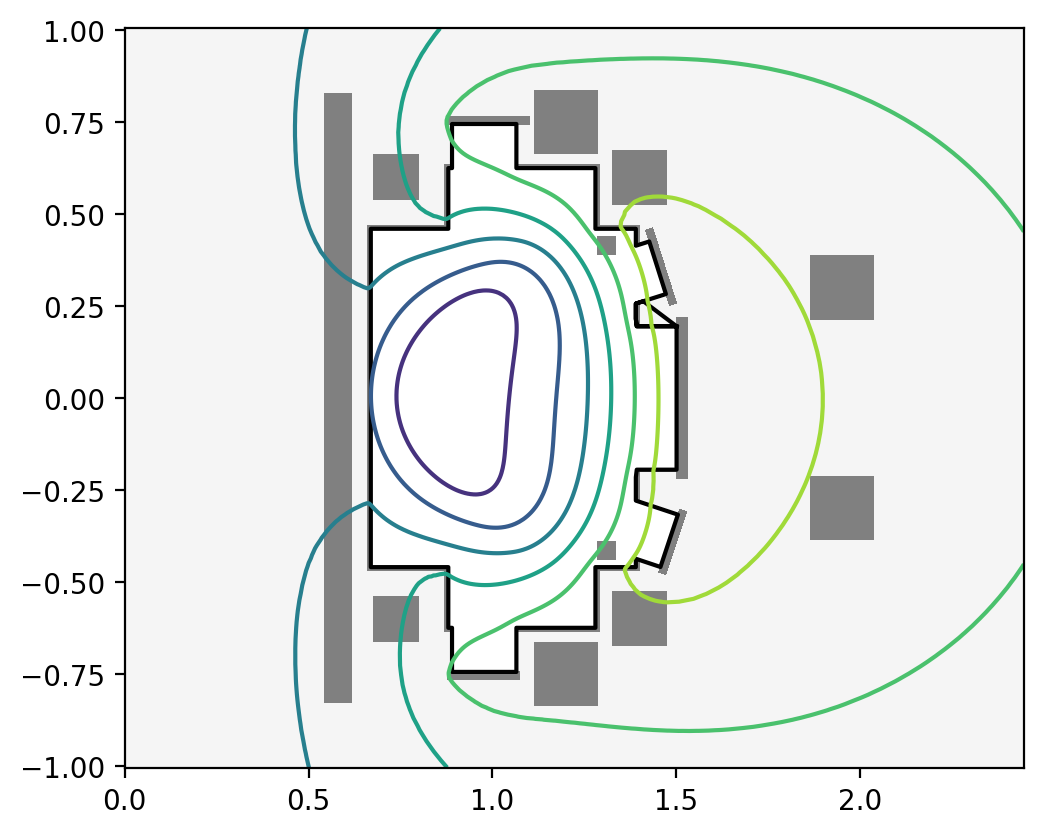

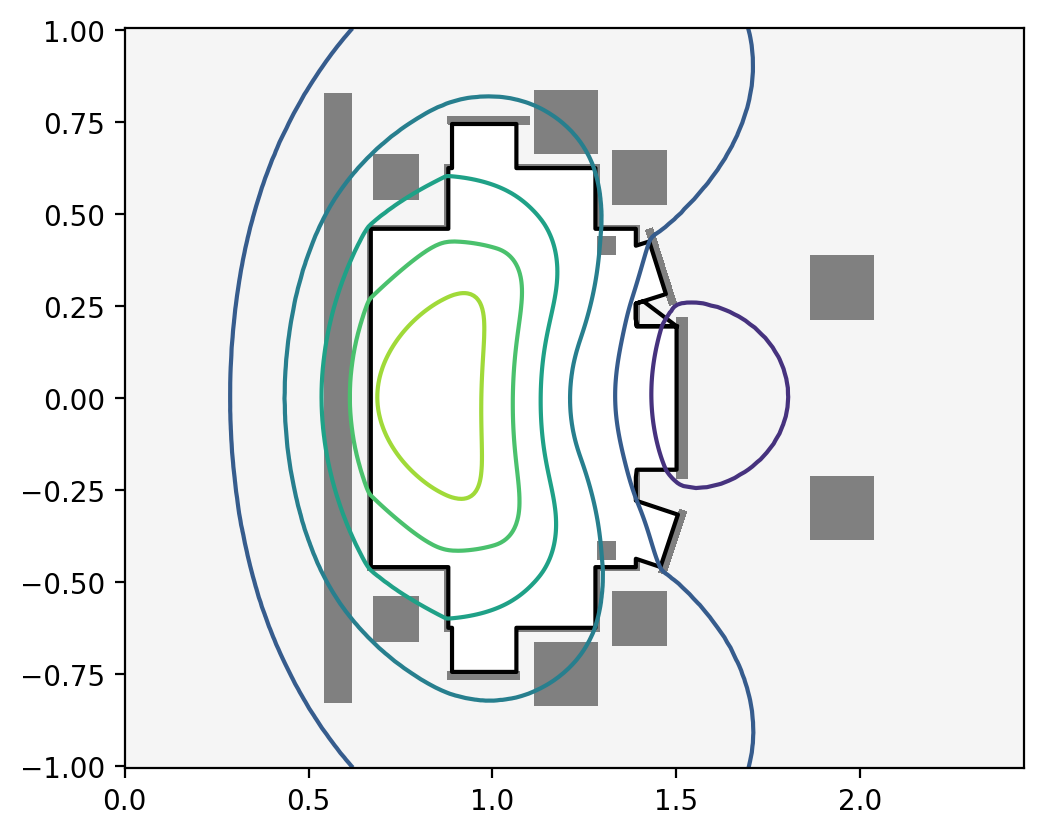

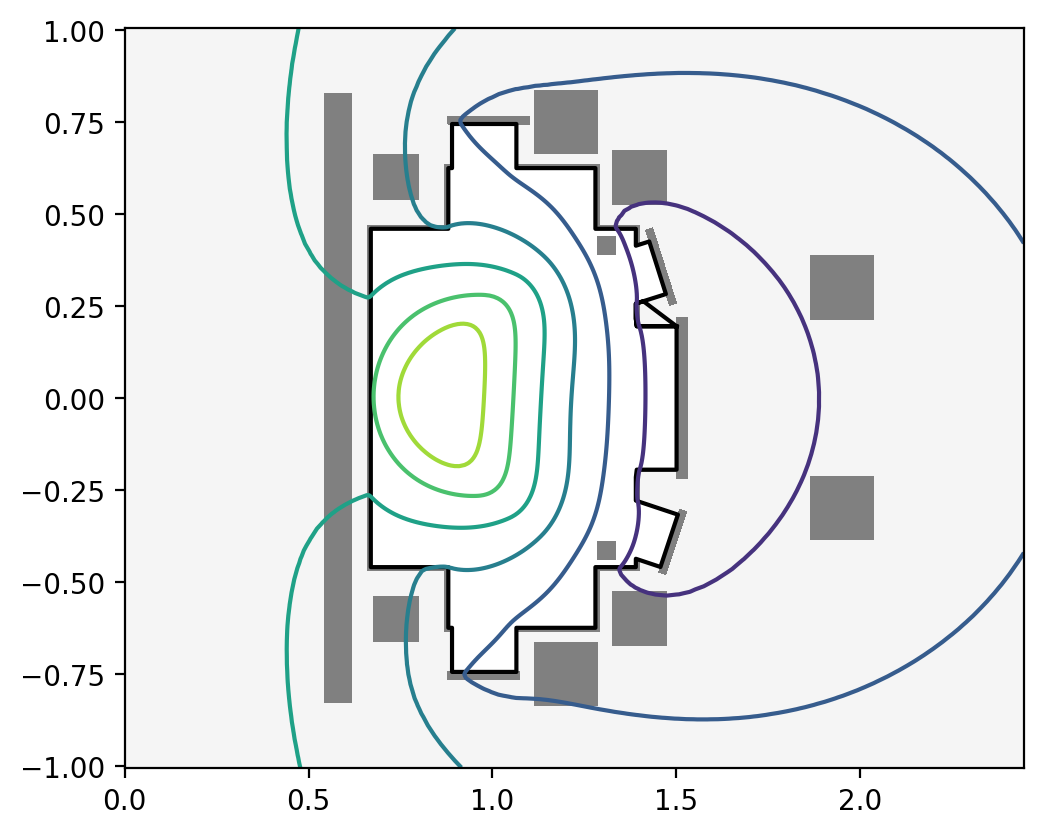

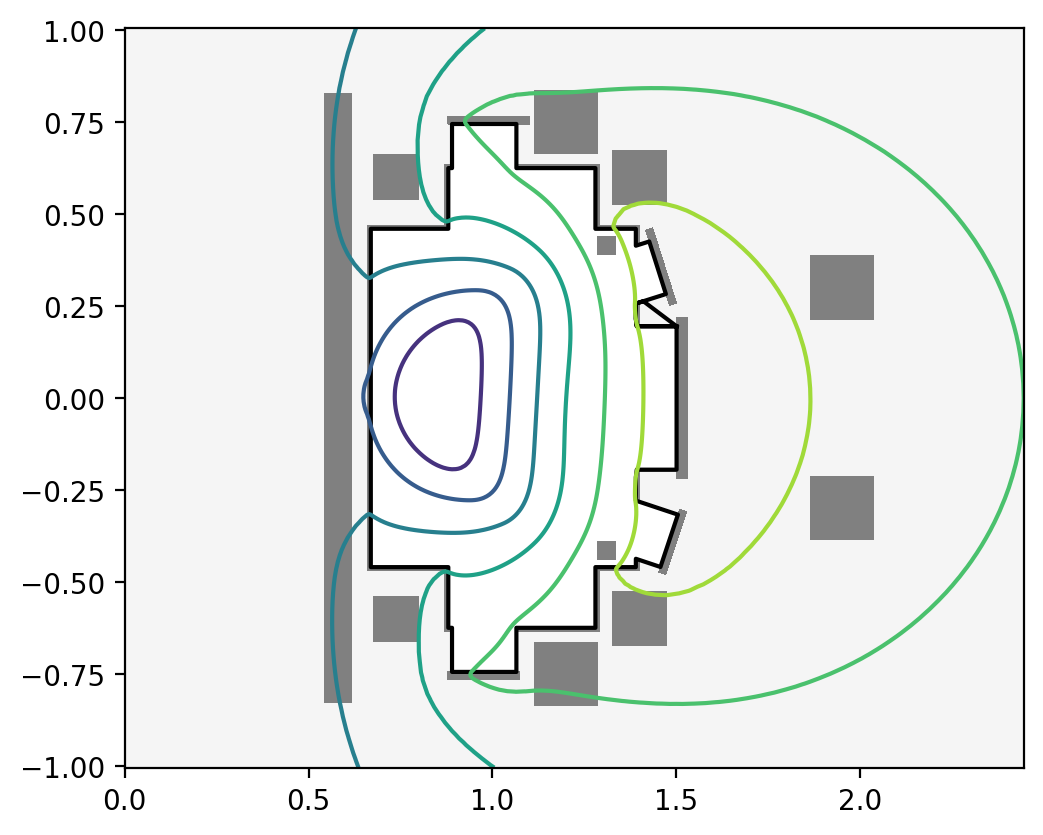

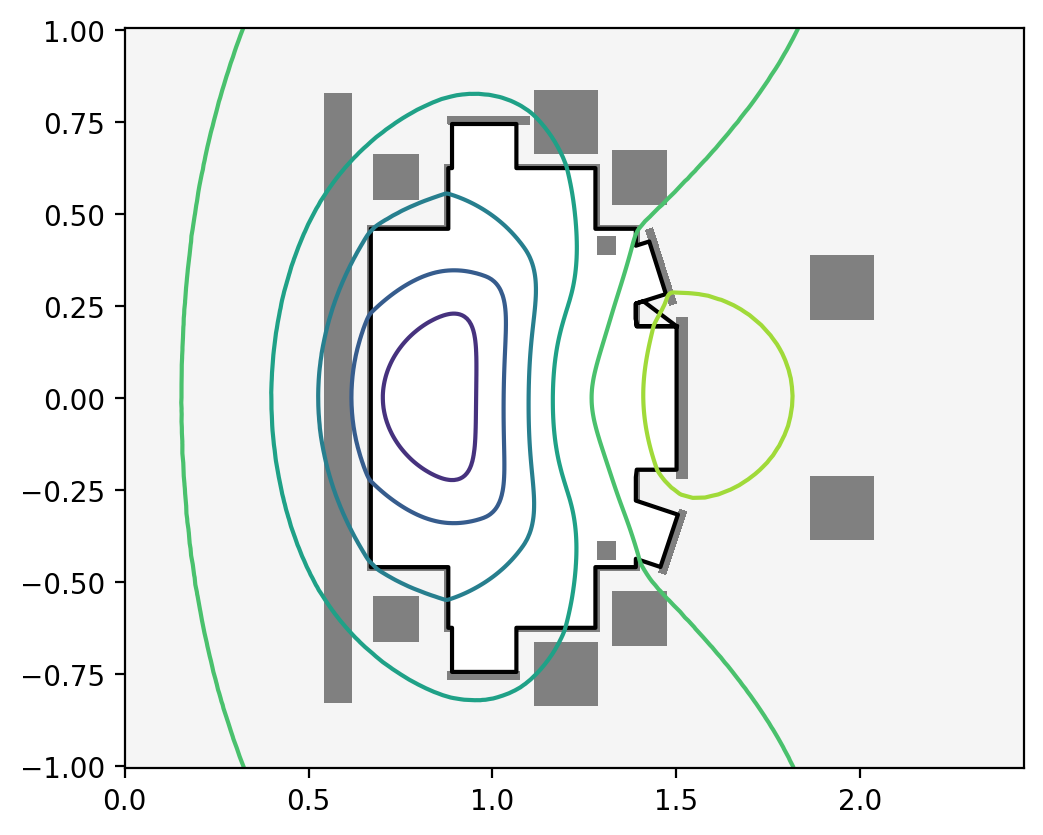

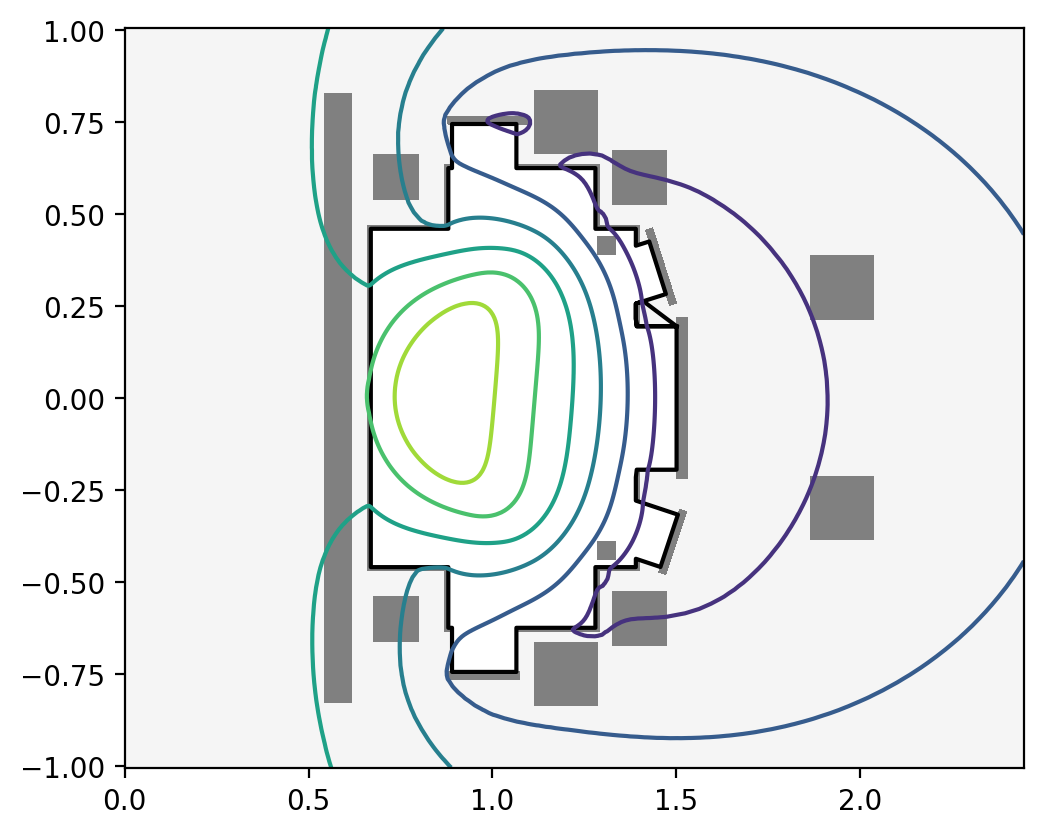

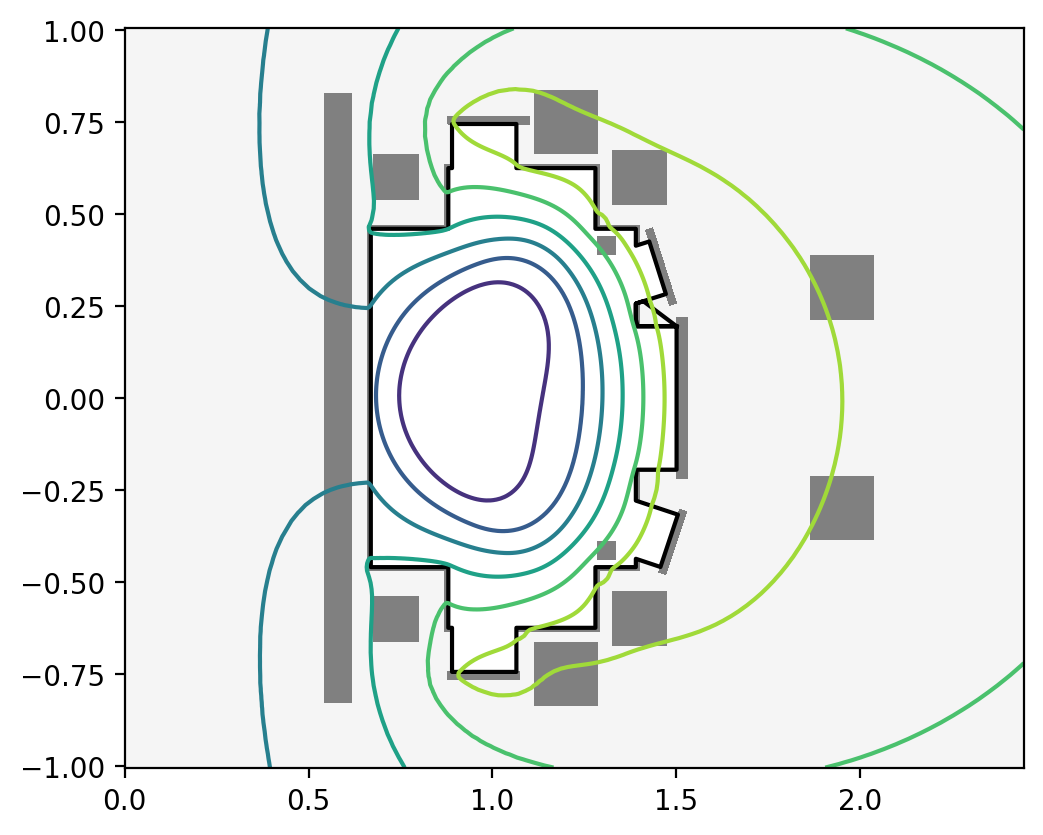

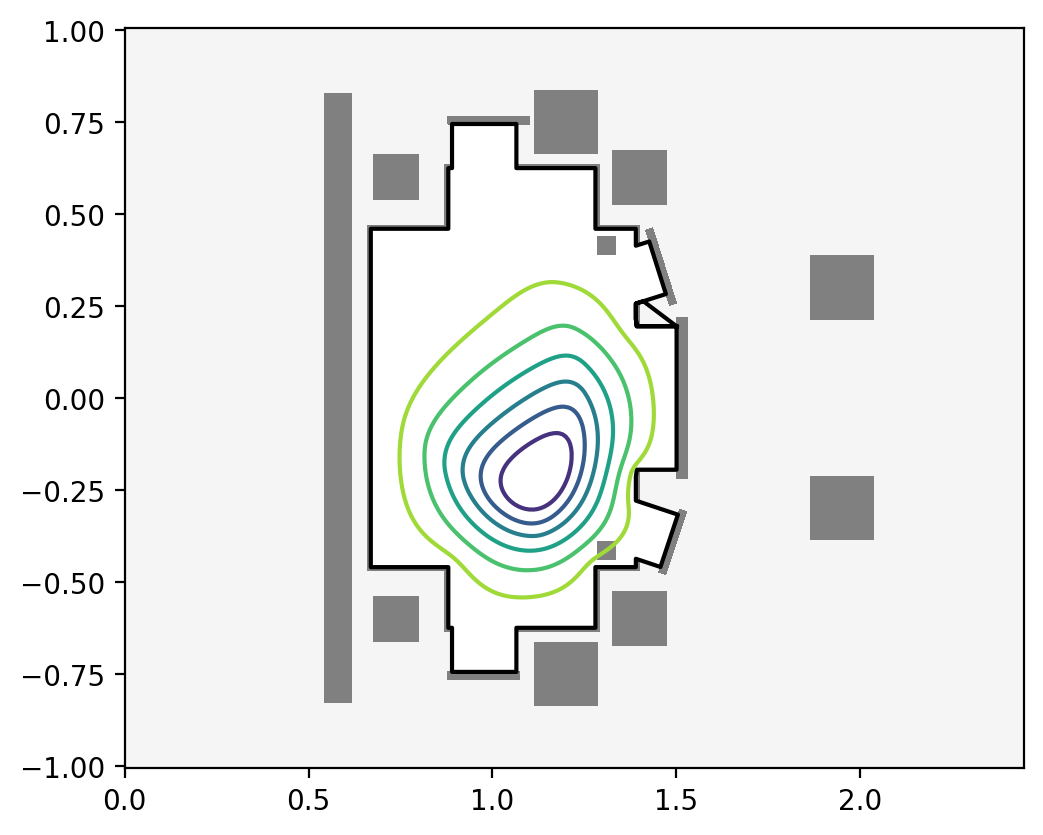

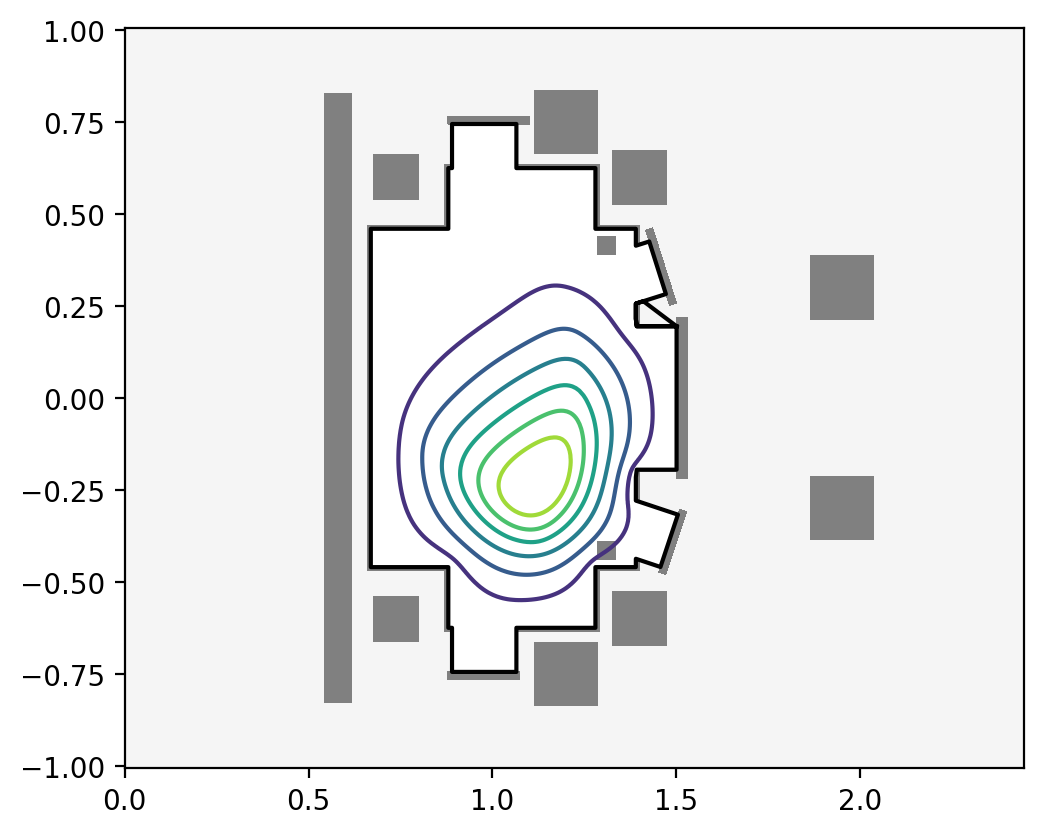

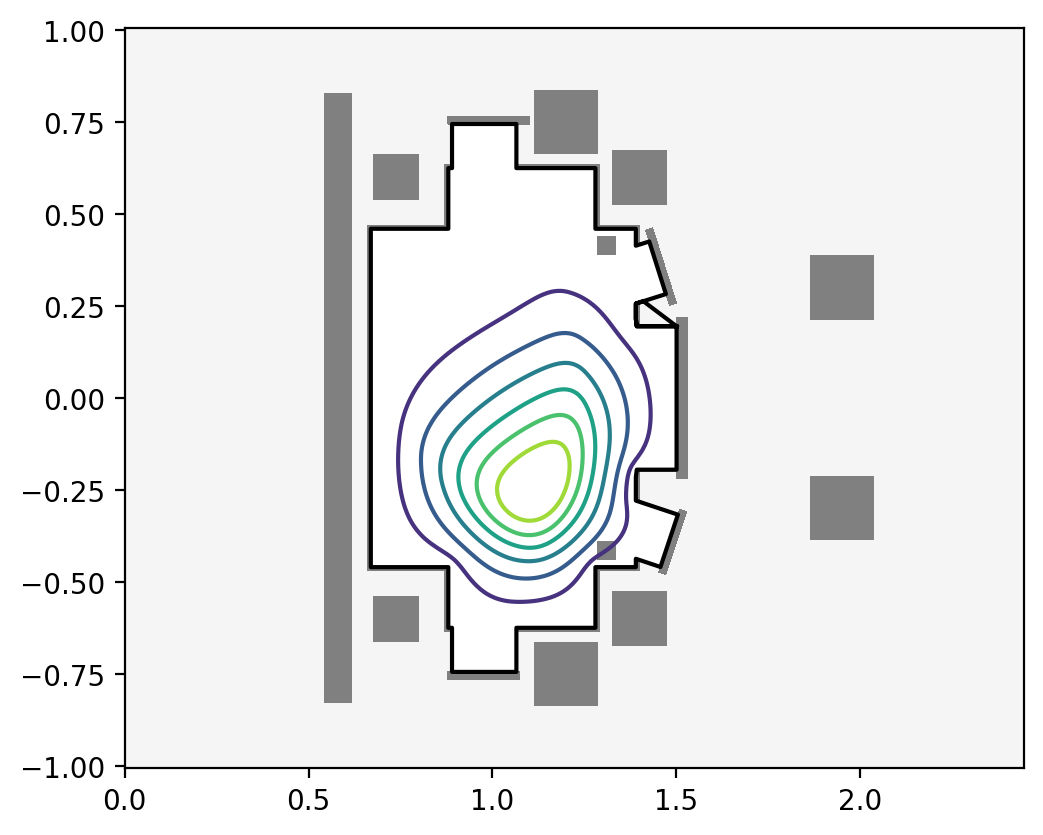

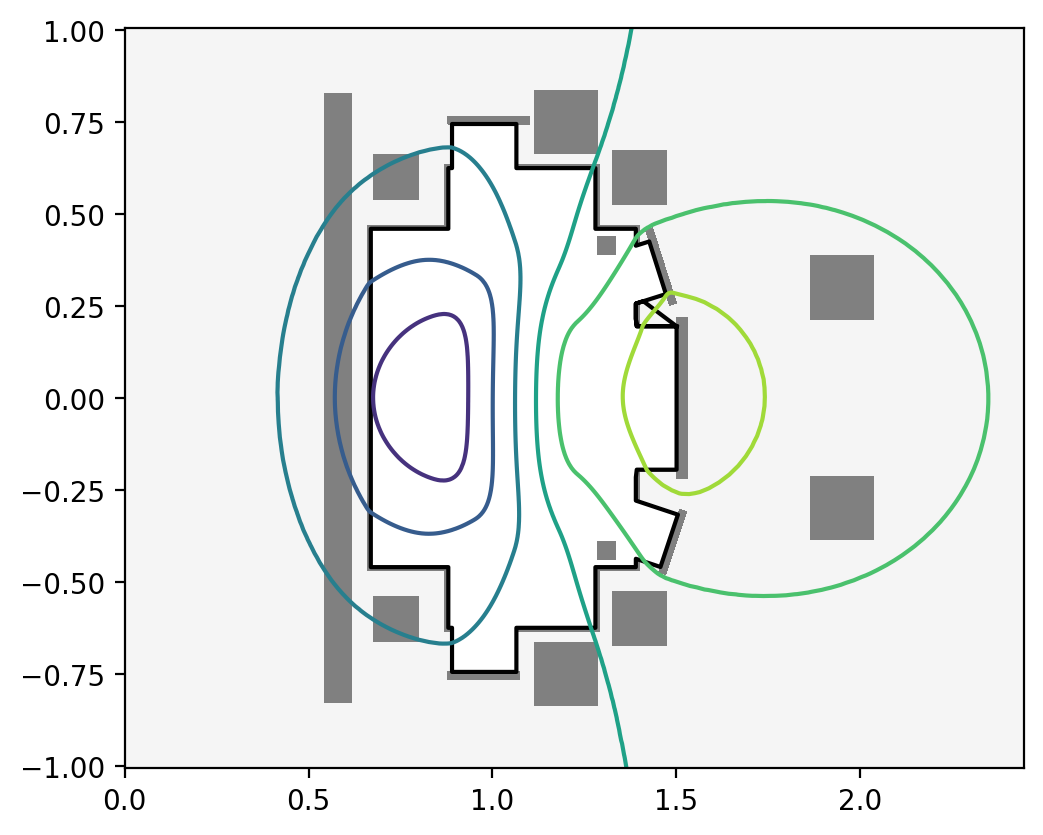

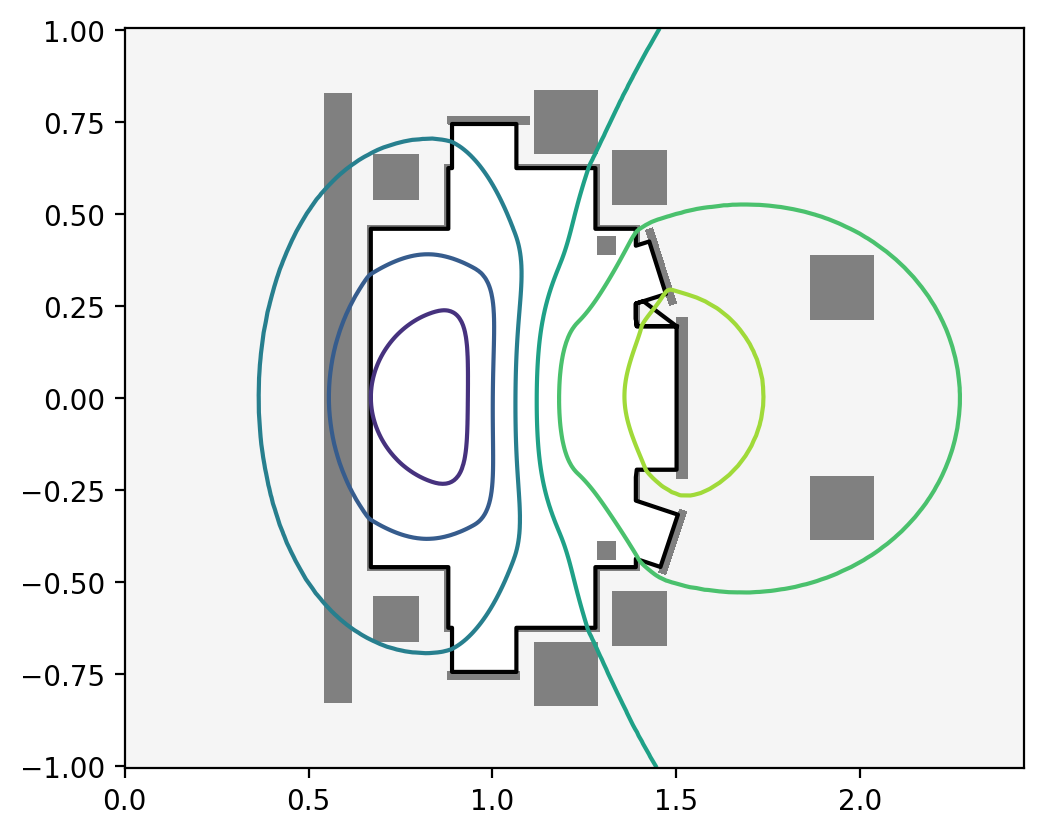

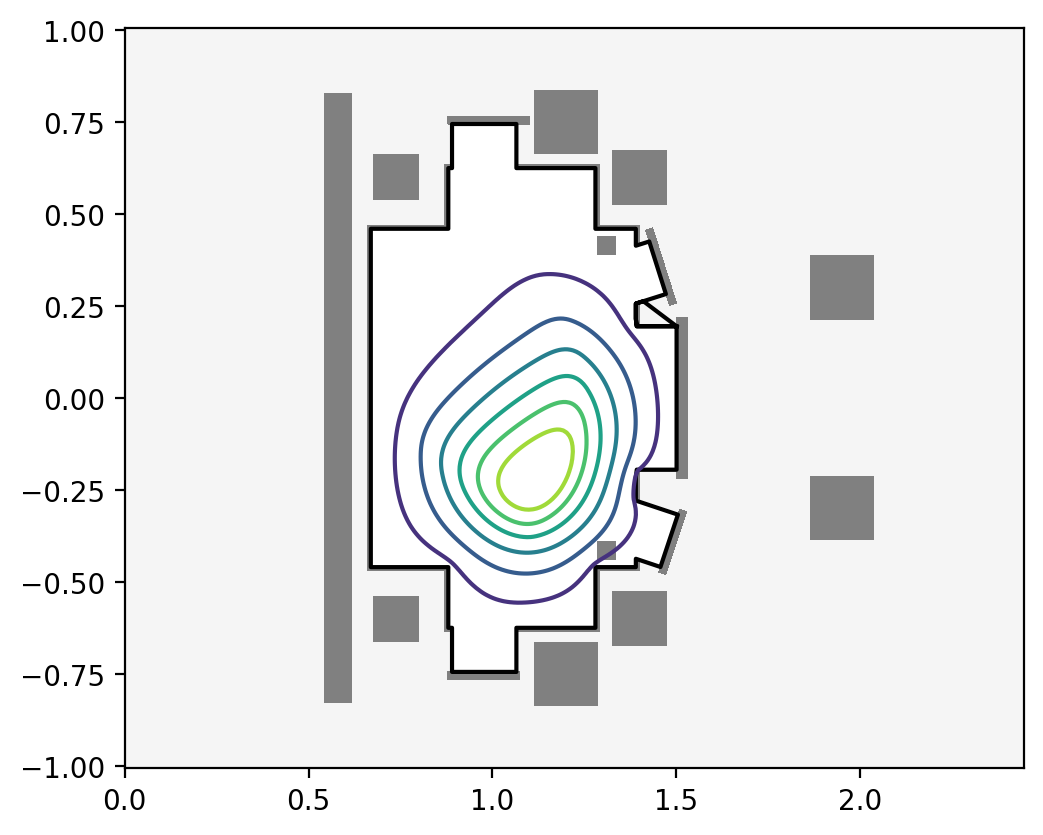

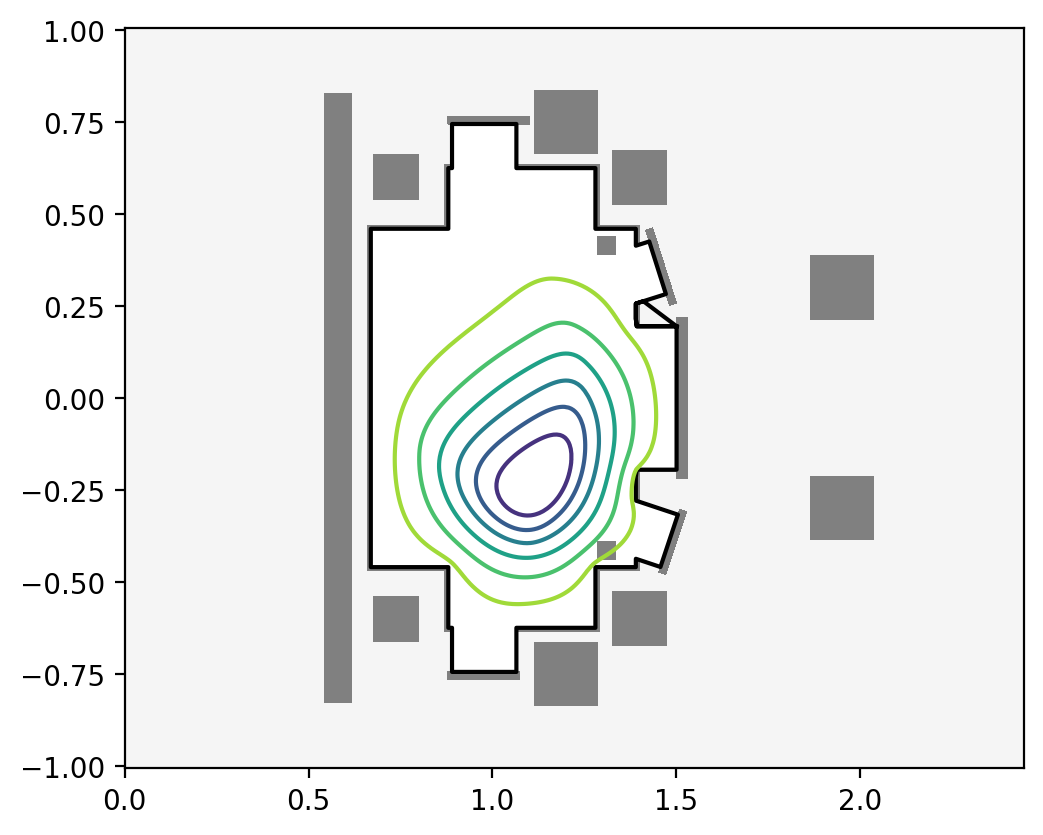

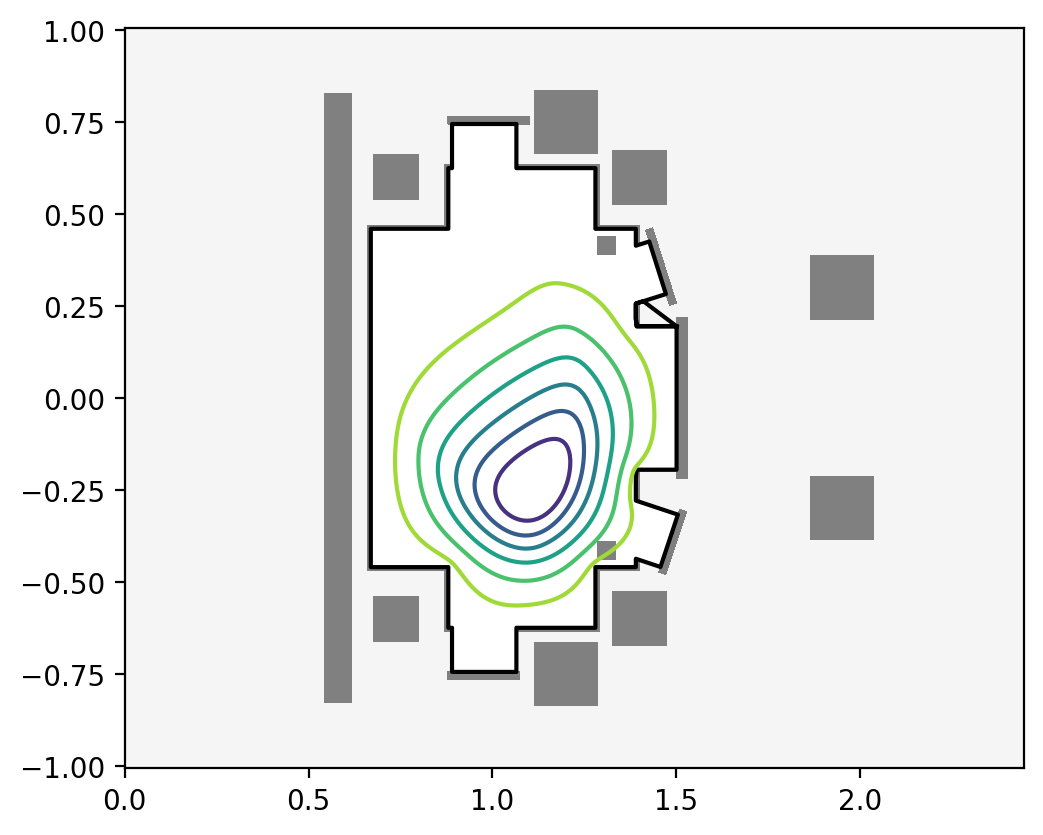

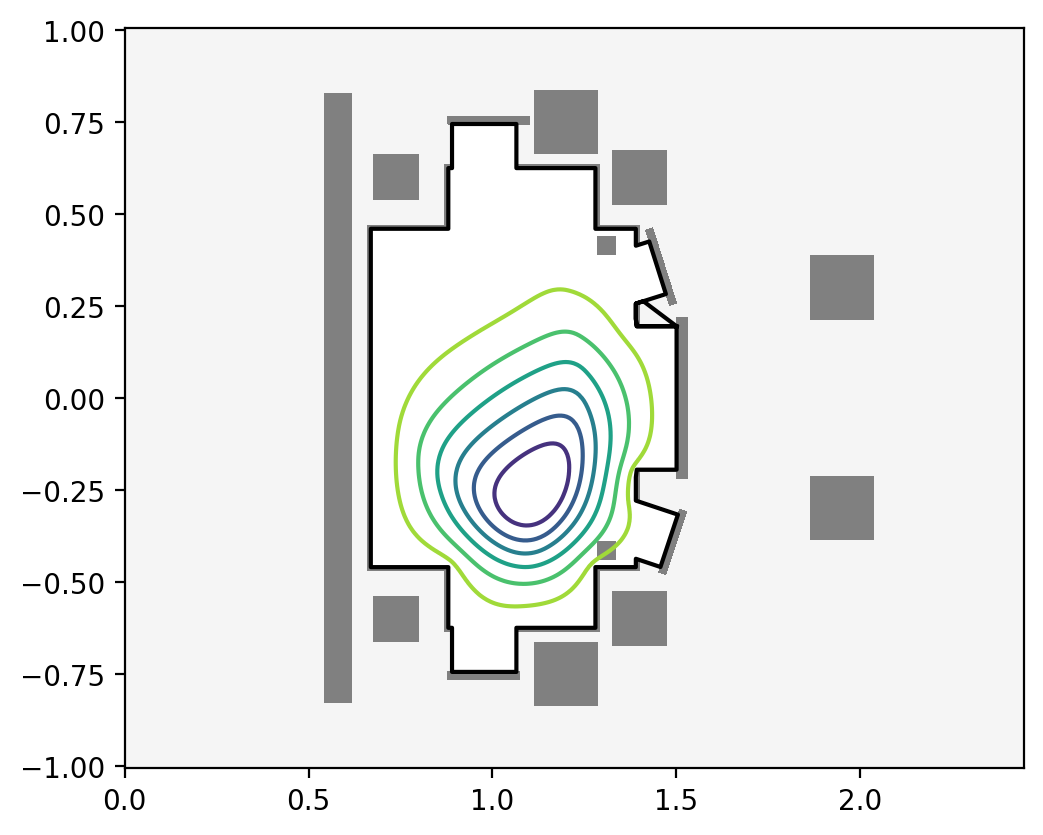

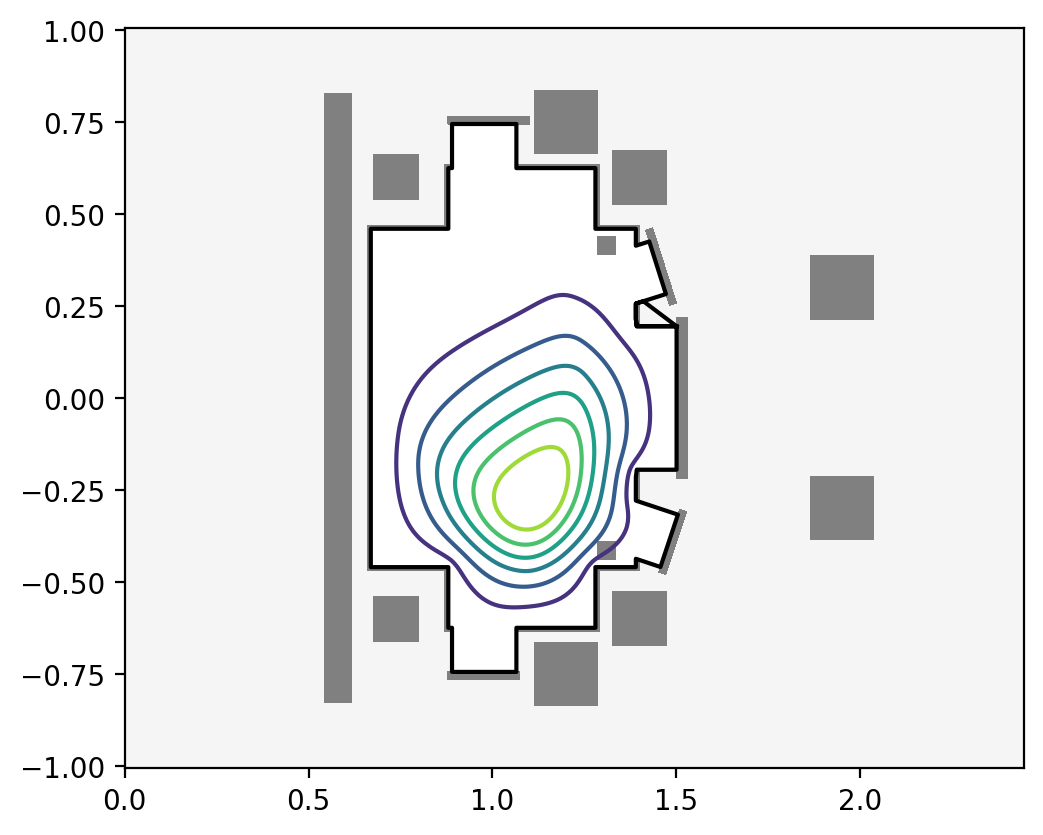

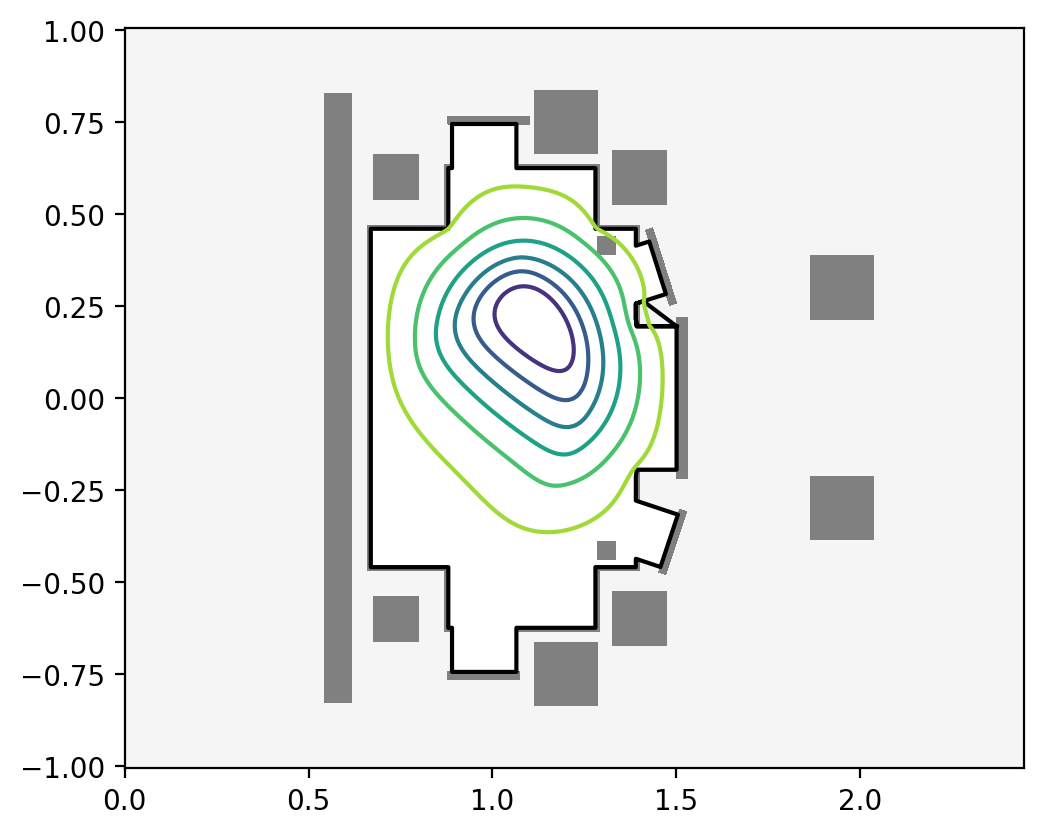

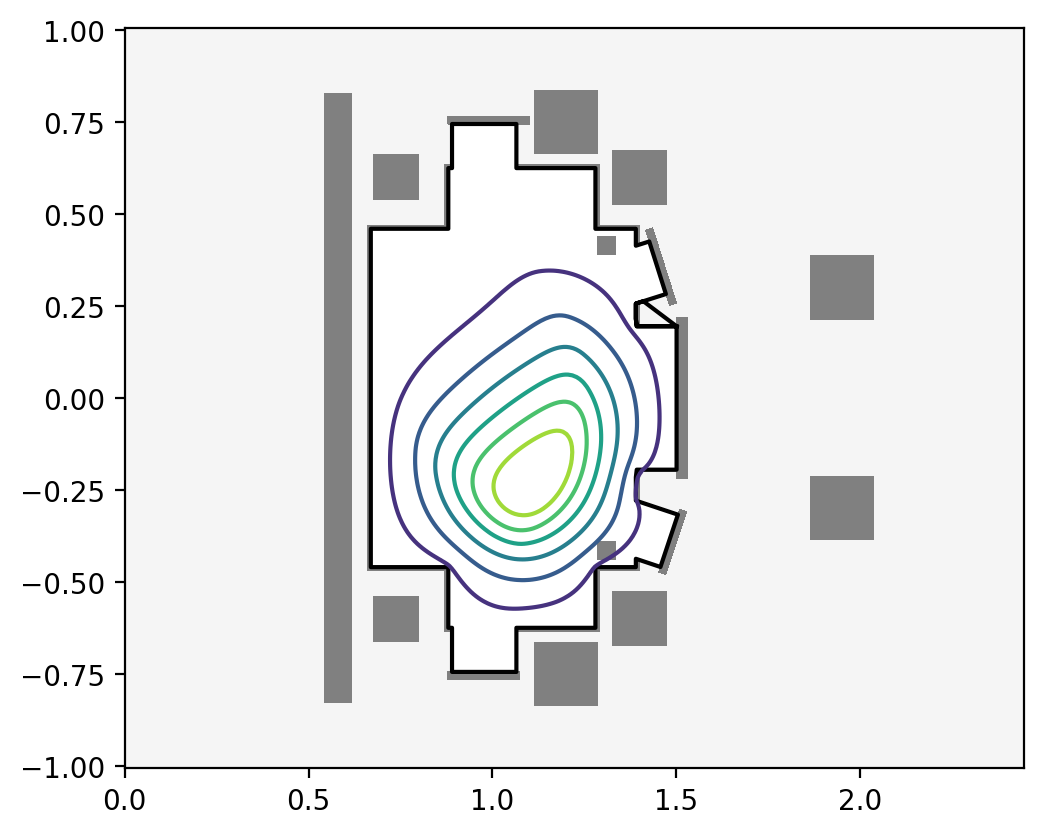

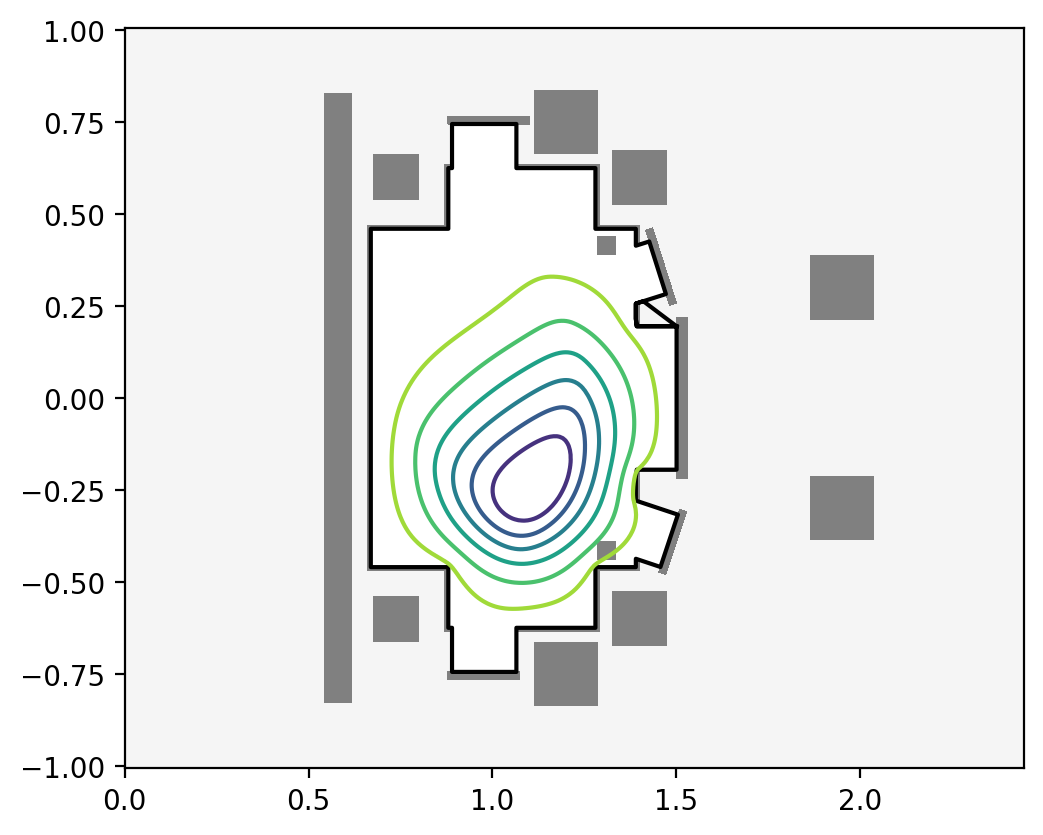

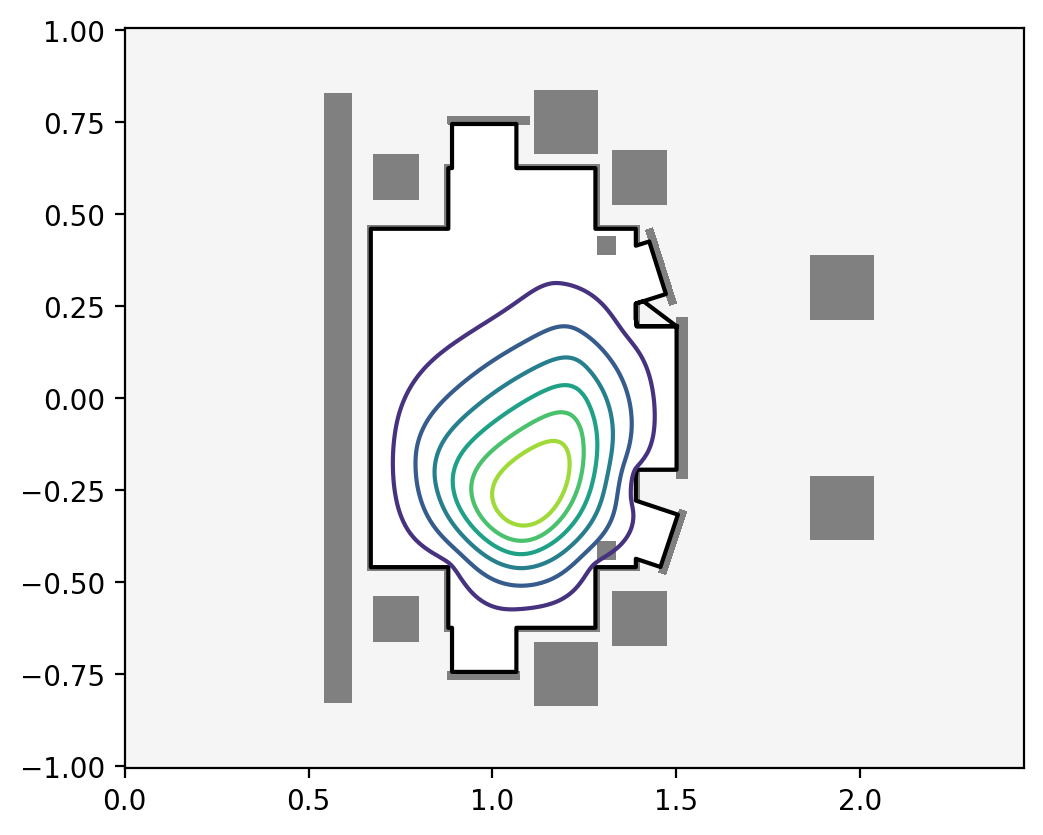

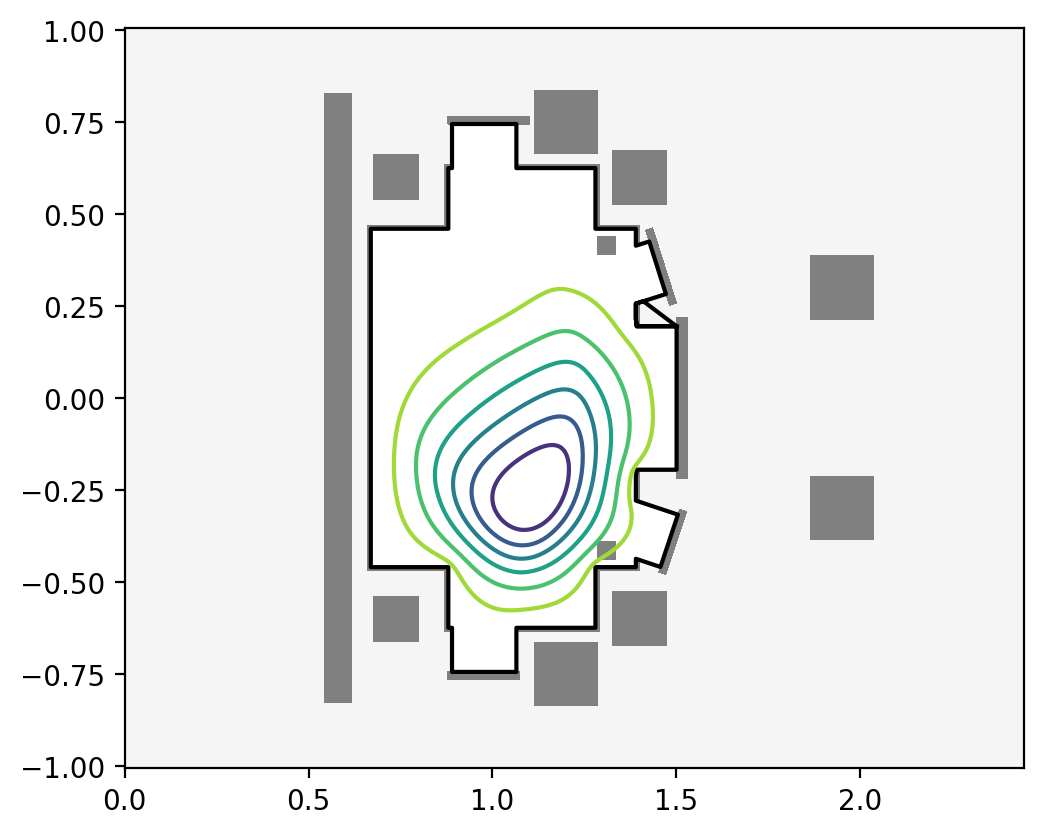

In [3]:
ds = np.linspace(-0.7, -.3, 5)
es = np.linspace(1.5, 1.9, 5)

gammas = []
taus = []
kappas = []
deltas = []
for d in ds:
    for e in es:
        r, z, zeff = boundaryShape(kapu = e, kapl = e, delu = d, dell = d, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588, eps = 0.2588/1, zoffset = 0, upnull = True, lonull = True, npts = 8)
        boundary = np.column_stack((r,z))
        boundary = np.nan_to_num(boundary)

        x_points = np.zeros((2,2))
        x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
        x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
        x_weights = 50*np.ones(2)
        mygs.set_saddles(x_points, x_weights)

        strike_ul = [1.06, 0.55]
        strike_ur = [1.255, 0.495]

        strike_ll = np.copy(strike_ul)
        strike_ll[1] = -strike_ul[1]
        strike_lr = np.copy(strike_ur)
        strike_lr[1] = -strike_ur[1]

        #boundary = np.vstack((boundary, strike_ul, strike_ll, strike_lr, strike_ur))
        isoflux_weights = 50*np.ones(len(boundary))
        #isoflux_weights[-4:] = 500

        mygs.set_isoflux(boundary, isoflux_weights)

        mygs.init_psi(0.68,0,0.2, 1.8,0.3)
        mygs.settings.maxits = 100
        mygs.update_settings()
        mygs.solve()

        eig_vals, eig_vecs = mygs.eig_td(-5.E4,10,True) 
        gammas.append(eig_vals[0,0])
        eig_wall, eigvec_wall = mygs.eig_wall()
        tau_w = 1/eig_wall[1][0]
        taus.append(tau_w)

        stats = mygs.get_stats()
        deltas.append(np.min((stats['deltaU'], stats['deltaL'])))
        kappas.append(np.max((stats['kappaU'], stats['kappaL'])))

        fig, ax = plt.subplots()
        mygs.plot_machine(fig,ax)
        mygs.plot_psi(fig,ax,eig_vecs[0,:],normalized=False,xpoint_color=None,opoint_color=None)

In [9]:
print(repr(np.array(gammas)))
print(taus)

array([   112.74624126,    121.31255827,    124.39079843,    135.27698073,
          144.50937096,    113.5231735 ,    116.39012502,    128.36369586,
          135.60307743,    152.73485803, -10911.80014805, -17231.59256055,
       -91149.41815196,    114.95028072,    104.56584875,  -2702.37793356,
        -4027.55945264,  -6487.03154948, -15313.66844228, -67284.20765431,
        -1205.62672654,  -1933.65112738,  -3091.04488647,  -5192.68694028,
        -8990.06367754])
[0.005815214792339726, 0.005815214792339727, 0.00581521479233973, 0.005815214792339725, 0.005815214792339734, 0.005815214792339722, 0.00581521479233973, 0.005815214792339724, 0.005815214792339735, 0.00581521479233973, 0.005815214792339722, 0.005815214792339734, 0.005815214792339733, 0.005815214792339732, 0.005815214792339733, 0.005815214792339735, 0.005815214792339726, 0.005815214792339728, 0.005815214792339733, 0.005815214792339732, 0.00581521479233973, 0.0058152147923397285, 0.005815214792339736, 0.005815214792339717,

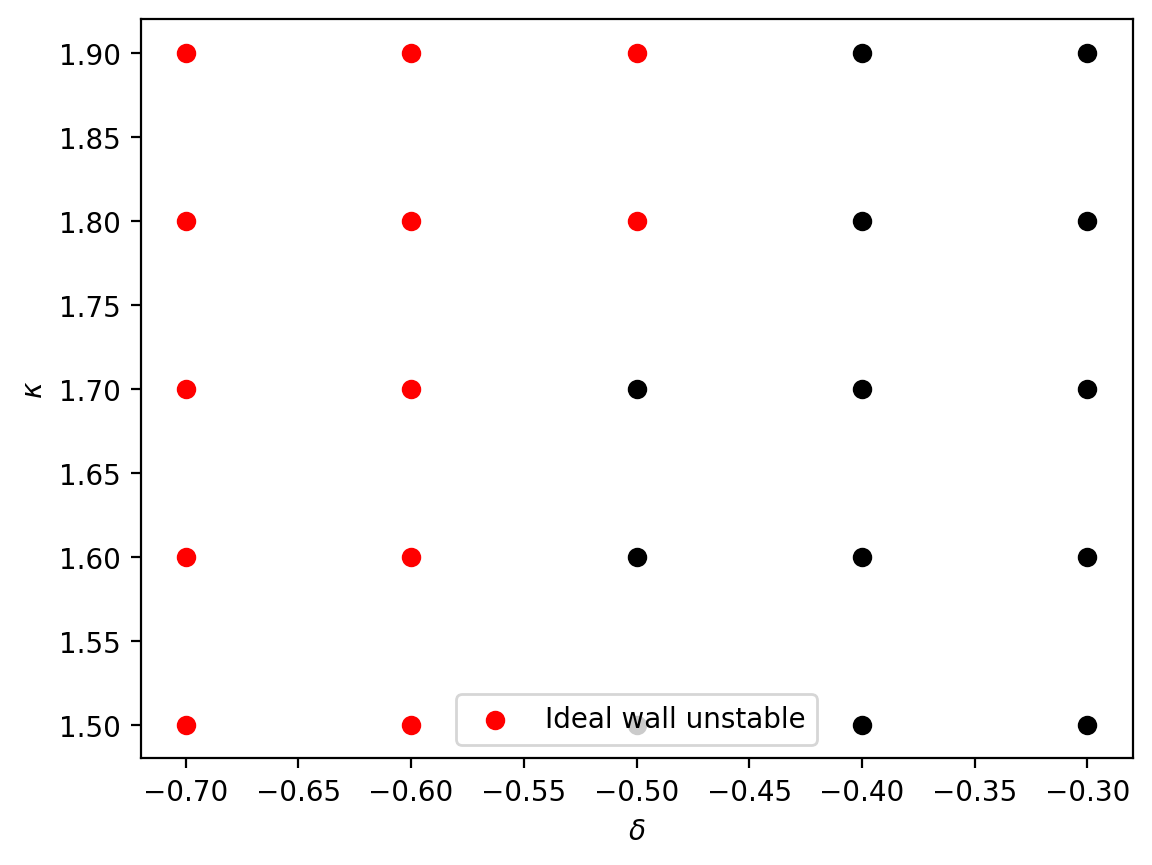

In [5]:
i = 0
for d in ds:
    for e in es:
        if gammas[i]>0:
            plt.scatter(d,e, color = 'red')
        else:
           plt.scatter(d,e, color = 'k') 
        i +=1

plt.xlabel(r'$\delta$')
plt.ylabel(r'$\kappa$')
plt.legend(['Ideal wall unstable'])

In [6]:

gtw = -np.array(gammas)*np.array(taus)
print(gtw)


[ -0.65564361  -0.70545858  -0.72335921  -0.7866647   -0.84035303
  -0.66016164  -0.67683358  -0.74646246  -0.78856102  -0.88818601
  63.45446163 100.20541195 530.05344475  -0.66846057  -0.60807287
  15.71490813  23.42112331  37.72348182  89.05227125 391.27211964
   7.01097837  11.24459664  17.97508995  30.19658991  52.27915128]


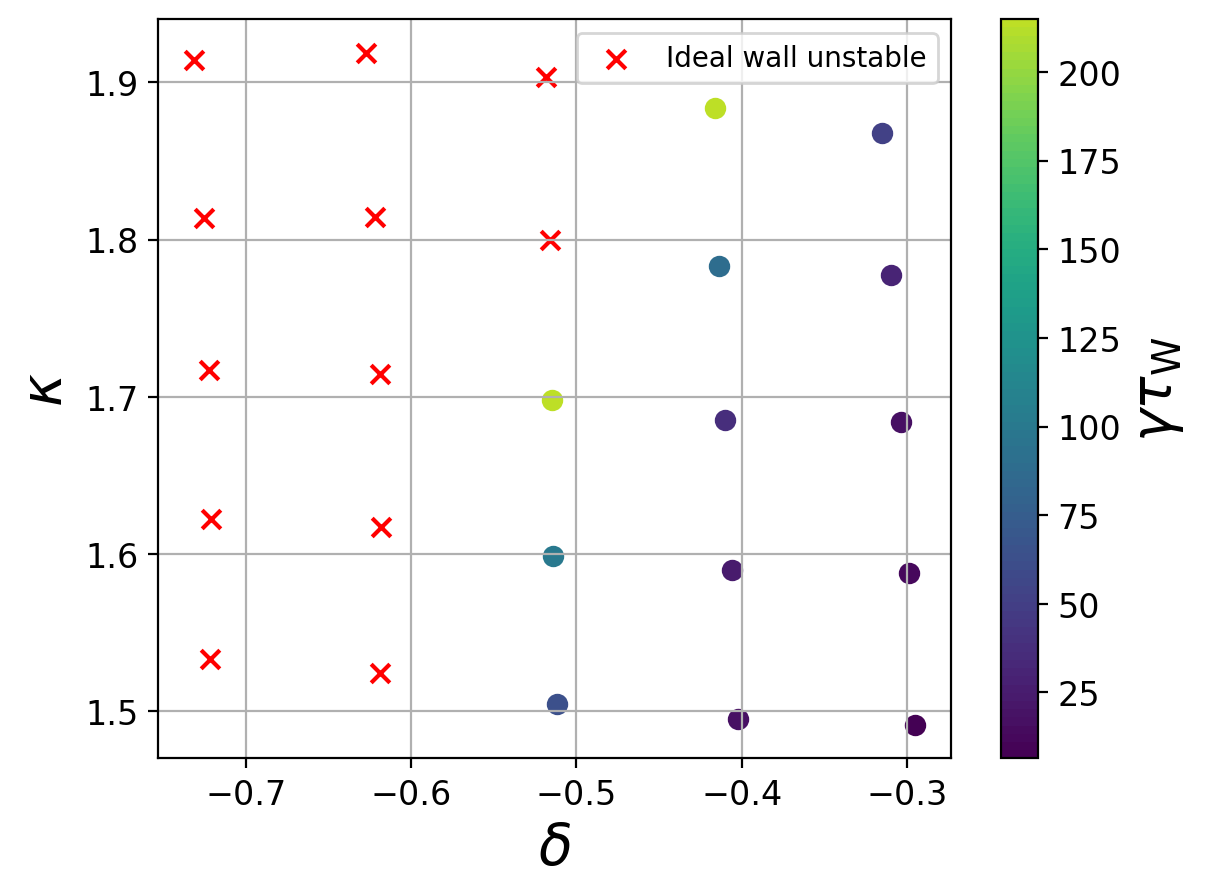

In [7]:
import matplotlib as mpl
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
cmap = mpl.cm.viridis(np.linspace(0,1,100))
cmap = mpl.colors.ListedColormap(cmap[:90,:-1])
#from matplotlib.colors import LinearSegmentedColormap
#colors = ["rebeccapurple","mediumpurple", "royalblue", "lightseagreen", "mediumaquamarine"]
#colors = ["darkslateblue","mediumslateblue","hotpink","orange", "gold"]
#nodes = [0.,0.22,  0.5, 0.78,1]
#cmap1 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
#cmap = cmr.bubblegum
norm = plt.Normalize(6.39784042, 214.87017924)
c = cmap(norm(gtw))
j = True
for i in range(len(deltas)):
    if gtw[i]>0:
        plt.scatter(deltas[i],kappas[i], color = c[i], s = 45)
    else:
        if j:
            plt.scatter(deltas[i],kappas[i], color = 'r', s = 45, marker = 'x', label = 'Ideal wall unstable')
            j = False
        else:
            plt.scatter(deltas[i],kappas[i], color = 'r', s = 45, marker = 'x')

sm = plt.cm.ScalarMappable(cmap=cmap, norm = norm)
cb = plt.colorbar(sm, ax = plt.gca())
cb.set_label(label = r'$\gamma \tau_\mathrm{W}$', size = 20)
plt.grid()
plt.xlabel(r'$\delta$', size = 20)
plt.ylabel(r'$\kappa$', size = 20)
plt.legend()
